# Guided Capstone Step 3 Exploratory Data Analysis

With Data Wrangling out of the way, it's time to move into the Exploratory Data Analysis phase of this guided capstone. In this exercise, you'll learn to build data profiles and plots, including a relationship plot and a data correlation plot. You'll also implement k-means clustering, complete clusters, and update a dataframe as a CSV file. Let's get started! 
  
**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
 
3.   **Exploratory Data Analysis** 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

**<font color='teal'> Start by loading the necessary packages as you did in step 2 of the guided capstone. Print out your current working directory to confirm you are in the correct project directory. </font>**

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

os.getcwd()

'/Users/suzutomato/springboard/GuidedCapstone'

**<font color='teal'> If you need to change your path, refer back to step 2 to review how to do this. Load the csv file you created in step 2. Remember, it should be saved inside your data subfolder. Print the first five rows.</font>**

In [2]:
df = pd.read_csv('./data/step2_output.csv')
df.head().T

0                    1                 2  \
Name               Alyeska Resort  Eaglecrest Ski Area  Hilltop Ski Area   
Region                     Alaska               Alaska            Alaska   
state                      Alaska               Alaska            Alaska   
summit_elev                  3939                 2600              2090   
vertical_drop                2500                 1540               294   
base_elev                     250                 1200              1796   
trams                           1                    0                 0   
fastEight                       0                    0                 0   
fastSixes                       0                    0                 0   
fastQuads                       2                    0                 0   
quad                            2                    0                 0   
triple                          0                    0                 1   
double                          0                    4                 0   
surface                         2                    0                 2   
total_chairs                    7                    4                 3   
Runs                           76                   36                13   
TerrainParks                    2                    1                 1   
LongestRun_mi                   1                    2                 1   
SkiableTerrain_ac            1610                  640                30   
Snow Making_ac                113                   60                30   
daysOpenLastYear              150                   45               150   
yearsOpen                      60                   44                36   
averageSnowfall               669                  350                69   
AdultWeekday                   65                   47                30   
AdultWeekend                   85                   53                34   
projectedDaysOpen             150                   90               152   
NightSkiing_ac                550                    0                30   

                                  3                    4  
Name               Arizona Snowbowl  Sunrise Park Resort  
Region                      Arizona              Arizona  
state                       Arizona              Arizona  
summit_elev                   11500                11100  
vertical_drop                  2300                 1800  
base_elev                      9200                 9200  
trams                             0                    0  
fastEight                         0                    0  
fastSixes                         1                    0  
fastQuads                         0                    1  
quad                              2                    2  
triple                            2                    3  
double                            1                    1  
surface                           2                    0  
total_chairs                      8                    7  
Runs                             55                   65  
TerrainParks                      4                    2  
LongestRun_mi                     2                  1.2  
SkiableTerrain_ac               777                  800  
Snow Making_ac                  104                   80  
daysOpenLastYear                122                  115  
yearsOpen                        81                   49  
averageSnowfall                 260                  250  
AdultWeekday                     89                   74  
AdultWeekend                     89                   78  
projectedDaysOpen               122                  104  
NightSkiing_ac                    0                   80

# Build data profile tables and plots 

**<font color='teal'> Print out the summary stats table transposed to fit on the screen using the `describe()` function.</font>**

In [3]:
df.describe().T

count         mean          std    min      25%  \
summit_elev        330.0  4591.818182  3735.535934  315.0  1403.75   
vertical_drop      330.0  1215.427273   947.864557   60.0   461.25   
base_elev          330.0  3374.000000  3117.121621   70.0   869.00   
trams              330.0     0.172727     0.559946    0.0     0.00   
fastEight          330.0     0.003030     0.055048    0.0     0.00   
fastSixes          330.0     0.184848     0.651685    0.0     0.00   
fastQuads          330.0     1.018182     2.198294    0.0     0.00   
quad               330.0     0.933333     1.312245    0.0     0.00   
triple             330.0     1.500000     1.619130    0.0     0.00   
double             330.0     1.833333     1.815028    0.0     1.00   
surface            330.0     2.621212     2.059636    0.0     1.00   
total_chairs       330.0     8.266667     5.798683    0.0     5.00   
Runs               330.0    48.214724    46.081366    3.0    19.00   
TerrainParks       330.0     2.820789     1.845918    1.0     2.00   
LongestRun_mi      330.0     1.433231     1.147352    0.0     0.60   
SkiableTerrain_ac  330.0   739.801223  1807.868079    8.0    85.00   
Snow Making_ac     330.0   174.873239   242.378848    2.0    55.00   
daysOpenLastYear   330.0   114.391725    32.956501    3.0   100.00   
yearsOpen          330.0    63.656535   109.263494    6.0    50.00   
averageSnowfall    330.0   183.203145   134.566629   18.0    70.00   
AdultWeekday       330.0    57.916957    23.898798   15.0    43.00   
AdultWeekend       330.0    64.166810    22.571324   17.0    49.00   
projectedDaysOpen  330.0   119.528886    29.209127   30.0   100.00   
NightSkiing_ac     330.0    56.890909    93.464882    0.0     0.00   

                           50%          75%      max  
summit_elev        3127.500000  7806.000000  13487.0  
vertical_drop       964.500000  1800.000000   4425.0  
base_elev          1561.500000  6325.250000  10800.0  
trams                 0.000000     0.000000      4.0  
fastEight             0.000000     0.000000      1.0  
fastSixes             0.000000     0.000000      6.0  
fastQuads             0.000000     1.000000     15.0  
quad                  0.000000     1.000000      8.0  
triple                1.000000     2.000000      8.0  
double                1.000000     3.000000     14.0  
surface               2.000000     3.000000     15.0  
total_chairs          7.000000    10.000000     41.0  
Runs                 34.000000    60.000000    341.0  
TerrainParks          2.820789     3.000000     14.0  
LongestRun_mi         1.000000     2.000000      6.0  
SkiableTerrain_ac   200.000000   739.801223  26819.0  
Snow Making_ac      132.500000   192.000000   3379.0  
daysOpenLastYear    110.500000   133.000000    305.0  
yearsOpen            58.000000    68.750000   2019.0  
averageSnowfall     144.000000   289.535714    669.0  
AdultWeekday         57.916957    67.000000    179.0  
AdultWeekend         64.166810    72.000000    179.0  
projectedDaysOpen   118.777778   137.000000    305.0  
NightSkiing_ac       27.000000    83.750000    650.0

**<font color='teal'> Histograms are an excellent way to review the range and density of values for each numeric feature in your dataset and to build data profiles. Plot the histograms for all numeric features and adjust the bins size to 25.</font>**

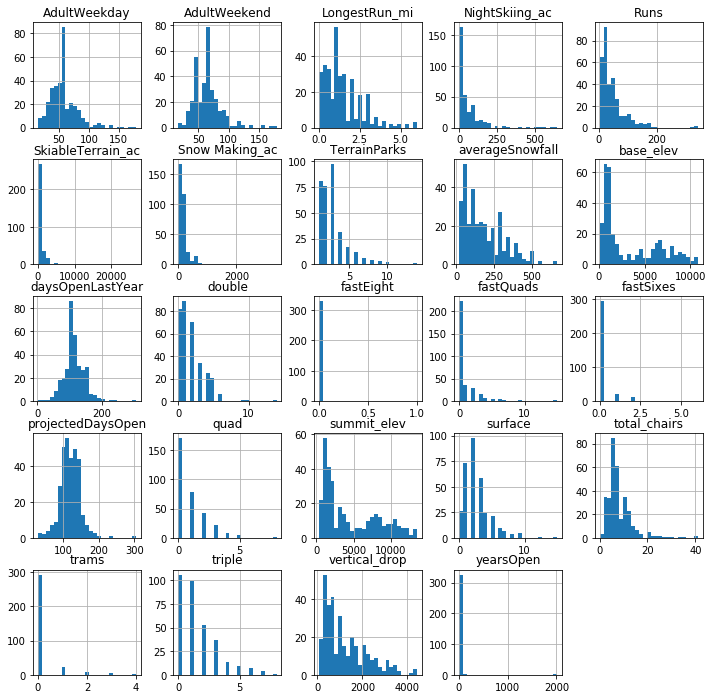

In [4]:
df.hist(bins=25, figsize=(12, 12))
plt.show()

Look for similarities in the features that may indicate that they are duplicates or highly correlated features. Make a note of your findings and any other interesting insights you find about these numeric features.

**<font color='teal'> Okay, now you should be getting a sense for what the data looks like. Let's create a barplot for the categorical features `Region` and `State` where the heights of the bars are the counts of each level in that variable. </font>**

**<font color='teal'>State Levels Plot</font>**

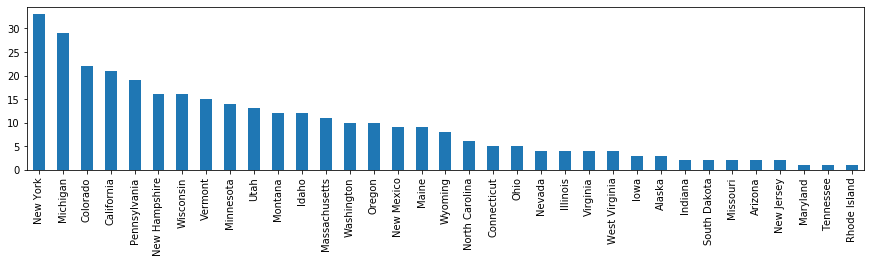

In [5]:
df.state.value_counts().plot.bar(figsize=(15, 3))
plt.show()

**<font color='teal'>Region Levels Plot</font>**

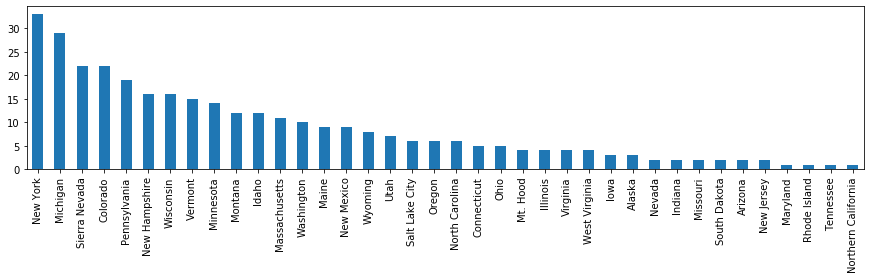

In [6]:
df.Region.value_counts().plot.bar(figsize=(15, 3))
plt.show()

By reviewing the State and Region count plots, you should notice that the Region feature is nearly identical to the State feature and therfore you can remove the Region column from the dataframe.**<font color='teal'> Remove the `Region` column using the drop function.</font>**

In [7]:
df.drop('Region', axis=1, inplace=True)

## Anamolies & outliers - review boxplots

**<font color='teal'> Print a boxplot for every column</font>**

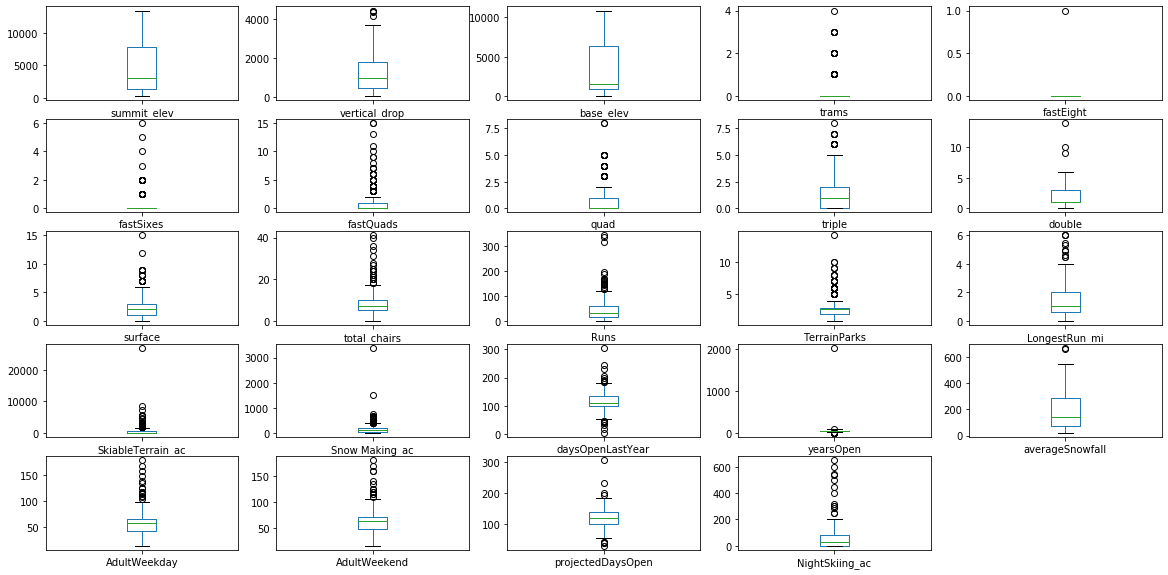

In [8]:
df.plot.box(figsize=(20,10), subplots=True, layout=(5,5))
plt.show()

You need to create boxplots and  histograms to evaluate the data for potential outliers or data anomalies. Generally, outliers are defined as observations that differ significantly from the other values in the dataset or feature. 

Reviewing the distribution of values by column will help you  interpret this. Outliers are extreme values that fall far outside the mean and standard deviation of a set of observations. They  can mislead the training process in building machine learning models. Outliers may be real anomalies in the observations, or artificial errors. 

One method for outlier analysis is extreme value analysis using a boxplot, which assumes a normal distribution. The figure below describes the components of a boxplot. Notice the outlier is the point outside the upper whisker end. 

![](AnnotatedBoxplot.png)
<font color='teal'> <b> Follow these steps:  

1. Create boxplots - earlier step
2. Apply outlier removal using the Interquartile range or replacement 
3. Review how many observations were removed </b> </font>

In [9]:
# Set elimination conditions.
# Whisker is up to a length of 1.5 times the IQR 
# below and above of the 1st and 3rd quartile respectively.
quantile_25, quantile_75 = df.quantile(0.25), df.quantile(0.75)
iqr = quantile_75 - quantile_25
whis_min = quantile_25 - 1.5 * iqr
whis_max = quantile_75 + 1.5 * iqr

not_outlier = (df >= whis_min) & (df <= whis_max)

In [10]:
# Exclude the numbers of fast lifts from elimination,
# as most of the resorts don't have one, yet it doesn't 
# mean having one makes it an outlier. It's rather an 
# advantage of a resort and should be taken into account.
# Can be converted into categorical data (have one or not.)
to_exclude = set(['fastEight', 'fastSixes', 'fastQuads', 'trams'])
to_exclude |= set(['Name', 'state']) # exclude categoricals as well.

to_update = [col for col in df.columns if col not in to_exclude]

In [27]:
# Remove outliers
# Note it drops all observations with one or more NaN value(s)
df[to_update] = df[to_update][not_outlier]
df.dropna(inplace=True, how='any') # 'any' for visibility

KeyError: "['base_elev'] not in index"

In [12]:
# Calculate the number of deleted observations.
orig_len = 330
print('{} observations are removed.'.format(orig_len - len(df.index)))

144 observations are removed.


There are many possible response variables you could have identified during Step 1 of the guided capstone. However, for the rest of this guided capstone project, you will focus on increasing revenue by increasing the lift ticket prices and the number of days the resort is open per year. In this case, you need to investigate the expected lift ticket price for Big Mountain based on all the other given resort characteristics. In addition, you'll want to predict the number of days the mountain is open each season.

<font color='teal'>**Review the `AdultWeekday`,`AdultWeekend` response variable distributions**</font>

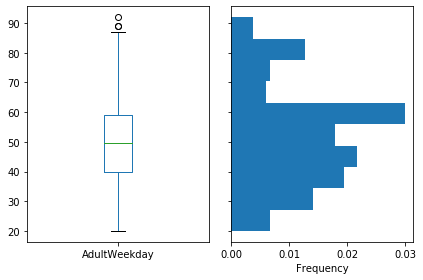

In [13]:
def print_dist_plots(col_name: str):
    '''Prints box plot and histgram for a column side by side.'''
    fig, (ax_box, ax_hist) = plt.subplots(nrows=1, ncols=2, sharey=True)
    df[col_name].plot.box(ax=ax_box)
    df[col_name].plot.hist(ax=ax_hist, density=True, orientation="horizontal")
    fig.tight_layout()
    plt.show()
    
print_dist_plots('AdultWeekday')

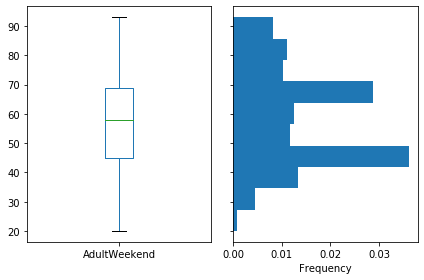

In [14]:
print_dist_plots('AdultWeekend')

<font color='teal'>**Review the `daysOpenLastYear`,`projecteDaysOpen` response variable distributions**</font>

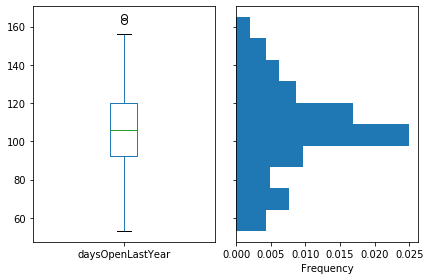

In [15]:
print_dist_plots('daysOpenLastYear')

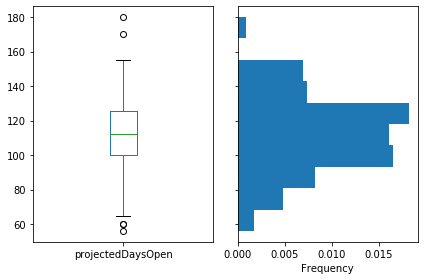

In [16]:
print_dist_plots('projectedDaysOpen')

After reviewing these response varible distributions, there doesn't appear to be any data issues to mitigate. Now, you'll move on to investigating feature relationships and interactions between the features and the response.

In [17]:
df.describe().T

count         mean          std    min      25%  \
summit_elev        186.0  3759.516129  3327.915925  315.0  1269.25   
vertical_drop      186.0   888.059140   613.278343  175.0   400.00   
base_elev          186.0  2862.000000  2946.863243   70.0   800.00   
trams              186.0     0.021505     0.145453    0.0     0.00   
fastEight          186.0     0.000000     0.000000    0.0     0.00   
fastSixes          186.0     0.059140     0.278504    0.0     0.00   
fastQuads          186.0     0.349462     0.779067    0.0     0.00   
quad               186.0     0.575269     0.733176    0.0     0.00   
triple             186.0     1.172043     1.149605    0.0     0.00   
double             186.0     1.618280     1.375260    0.0     1.00   
surface            186.0     2.252688     1.408706    0.0     1.00   
total_chairs       186.0     6.048387     2.649390    0.0     4.00   
Runs               186.0    32.264595    20.617088    7.0    17.00   
TerrainParks       186.0     2.178845     0.965930    1.0     1.00   
LongestRun_mi      186.0     1.039067     0.734521    0.0     0.40   
SkiableTerrain_ac  186.0   269.590329   359.480210    8.0    60.00   
Snow Making_ac     186.0   107.887551    71.589043    5.0    45.00   
daysOpenLastYear   186.0   106.021510    23.454969   53.0    92.40   
yearsOpen          186.0    59.740089    14.217767   22.0    52.25   
averageSnowfall    186.0   145.649485   108.170077   18.0    57.00   
AdultWeekday       186.0    51.819909    16.768728   20.0    40.00   
AdultWeekend       186.0    58.233149    15.964905   20.0    45.00   
projectedDaysOpen  186.0   112.362169    21.681952   56.0   100.00   
NightSkiing_ac     186.0    42.827957    47.387562    0.0     0.00   

                           50%          75%      max  
summit_elev        2057.500000  6272.250000  12162.0  
vertical_drop       700.000000  1200.000000   3062.0  
base_elev          1270.000000  4631.250000  10790.0  
trams                 0.000000     0.000000      1.0  
fastEight             0.000000     0.000000      0.0  
fastSixes             0.000000     0.000000      2.0  
fastQuads             0.000000     0.000000      4.0  
quad                  0.000000     1.000000      2.0  
triple                1.000000     2.000000      5.0  
double                1.000000     2.000000      6.0  
surface               2.000000     3.000000      6.0  
total_chairs          6.000000     7.000000     14.0  
Runs                 25.500000    45.000000    121.0  
TerrainParks          2.000000     2.820789      4.0  
LongestRun_mi         1.000000     1.500000      4.0  
SkiableTerrain_ac   129.500000   276.250000   1704.0  
Snow Making_ac       97.500000   174.873239    320.0  
daysOpenLastYear    105.666667   120.000000    165.0  
yearsOpen            58.000000    70.000000     95.0  
averageSnowfall     120.000000   210.000000    500.0  
AdultWeekday         49.500000    59.000000     92.0  
AdultWeekend         58.000000    68.750000     93.0  
projectedDaysOpen   112.125000   125.750000    180.0  
NightSkiing_ac       35.000000    70.000000    200.0

# Explore data relationships

<font color='teal'>**Create pairplots, or what is commonly referred to as biplots**</font>

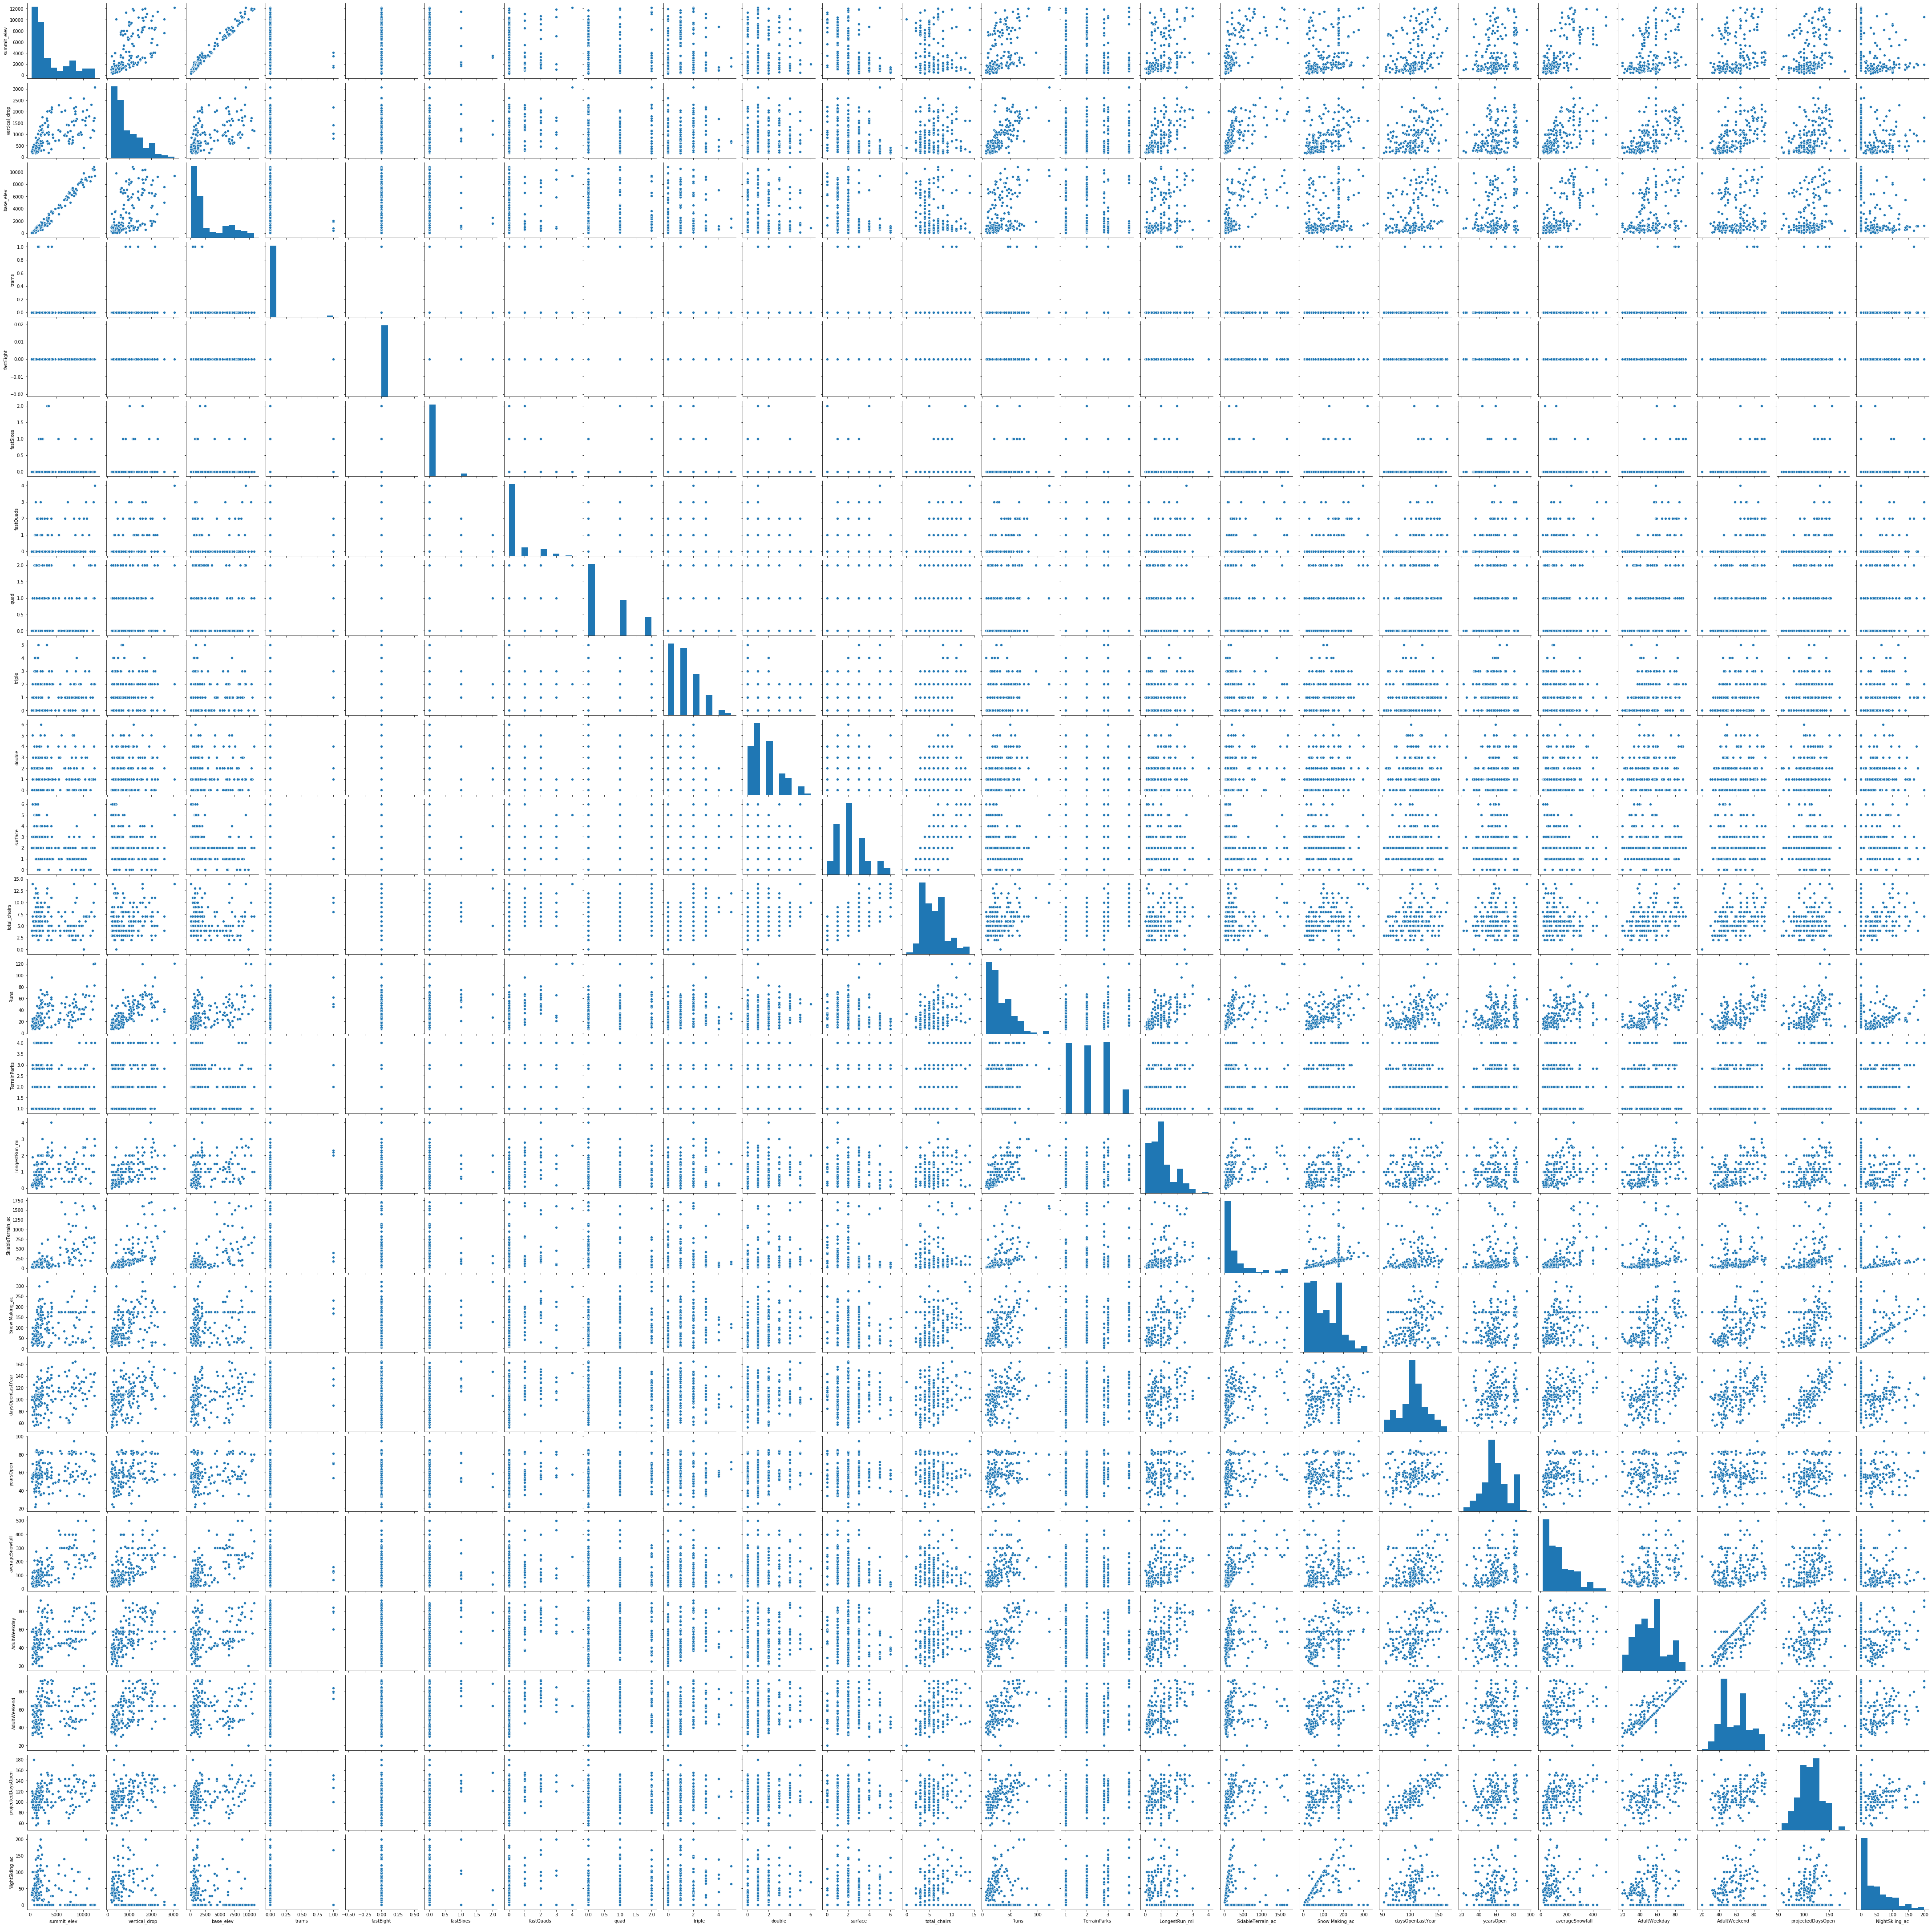

In [18]:
sns.pairplot(df)
plt.show()

# Identification and creation of features

<font color='teal'>**Create a Pearson correlation heatmap**</font>

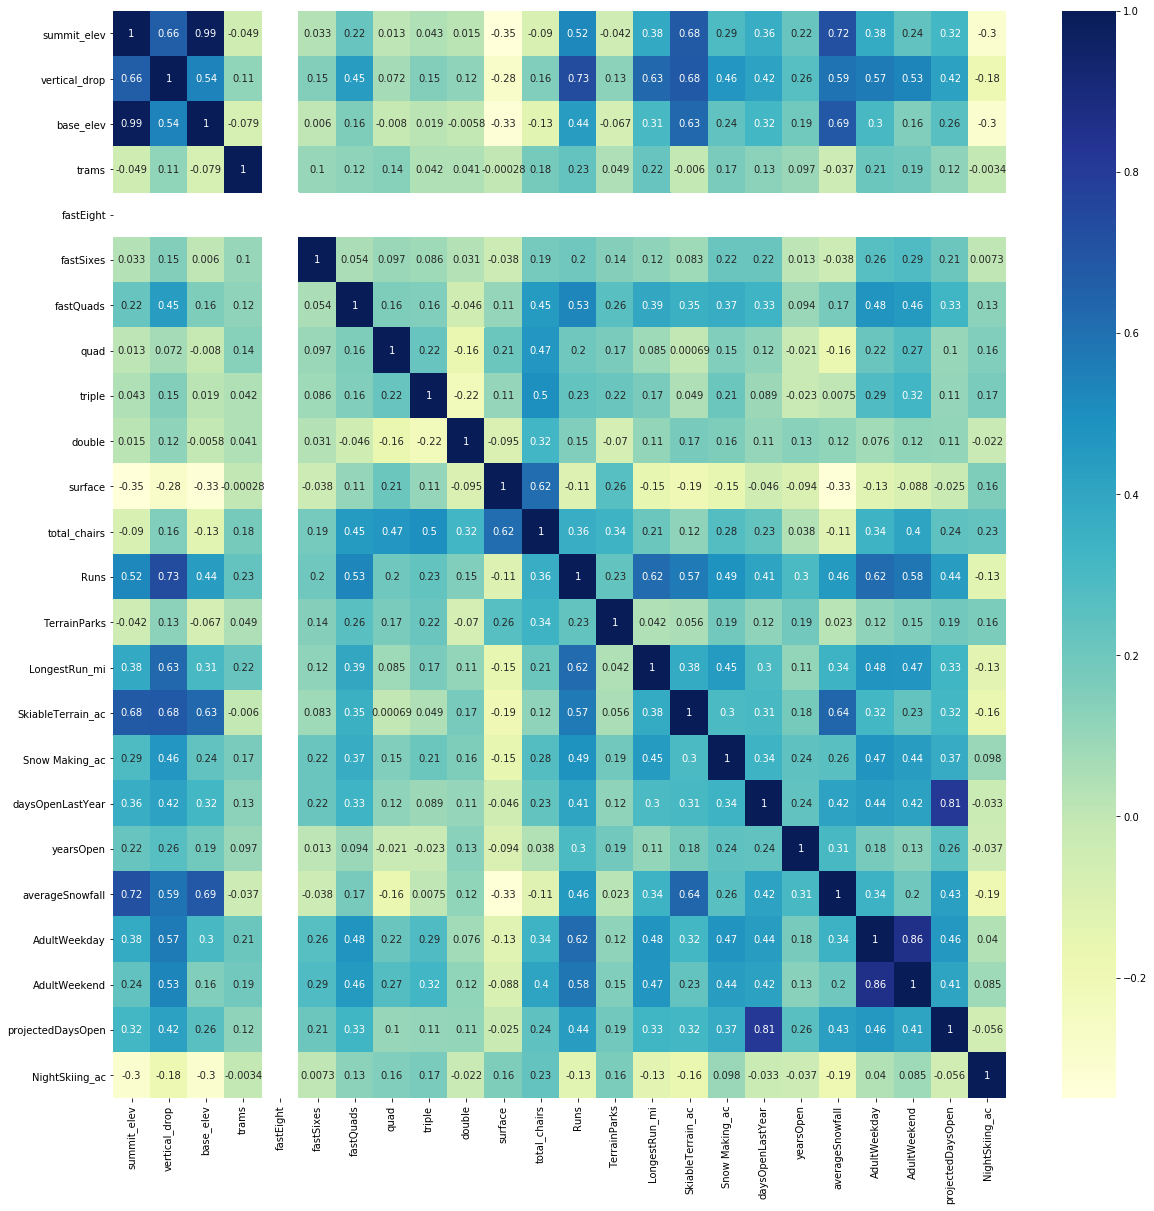

In [19]:
corr_df = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_df, cmap="YlGnBu", annot=True)
plt.show()

When reviewing the Pearson correlation coefficient heat map, you can see substantial differences in the correlations compared to the response variable(s) as well as in the features when compared to each other. The heatmap helps identify features that suffer from Multi-collinearity. 

<font color='teal'>**Use the correlation matrix displayed in the heatmap to select and remove collinear features. 
Remember to exclude the response variable(s) from the matrix to ensure they are retained in your final model development dataset. Then select those features that are more than 95% correlated for removal.**</font>

In [20]:
res_vars = set(['AdultWeekday', 'AdultWeekend', 
                'daysOpenLastYear', 'projectedDaysOpen'])
to_remove = {}

for lab_corr, row in corr_df.iterrows():
    if lab_corr in res_vars:
        continue
    for lab_row, coef in row.iteritems():
        if ((coef > 0.95) &
            (lab_corr != lab_row) &
            (lab_row not in to_remove)):
            to_remove.setdefault(lab_corr, []).append(lab_row)

print('List of features with a coefficient more than 0.95')
print('--------------------------------------------------')
i = 1
for k, vs in to_remove.items():
    for v in vs:
        print('{}: {} - {}'.format(i, k, v))
        i += 1

List of features with a coefficient more than 0.95
--------------------------------------------------
1: summit_elev - base_elev


In [21]:
df.drop('base_elev', axis=1, inplace=True)

Now you'll address the feature creation piece of this step. You can create additional features through many methods, such as: combining several features, grouping features into bins, or even by applying an unsupervised classification algorithm, such as k-means clustering and using the clusters as features in your model development dataset.

Run the next two cells below to create an Elbow plot. The Elbow plot is a diagnostic tool that helps you determine the number of clusters to include in your k-means clustering implementation. In this example, the error between clusters and within clusters is compared for a range of 1 to 11 clusters, and it appears the elbow is between two and four, therefore we set the parameter k = 3.

In [22]:
from sklearn.cluster import KMeans
x = df.drop(['Name','state'], axis =1).values

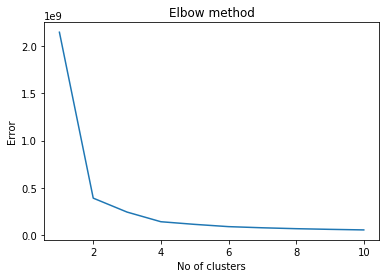

In [23]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

<font color='teal'>**Fit the k-means algorithm with the k parameter set to three and plot the results.**</font>

In [24]:
labels = KMeans(n_clusters = 3).fit_predict(x)
df['cluster'] = labels

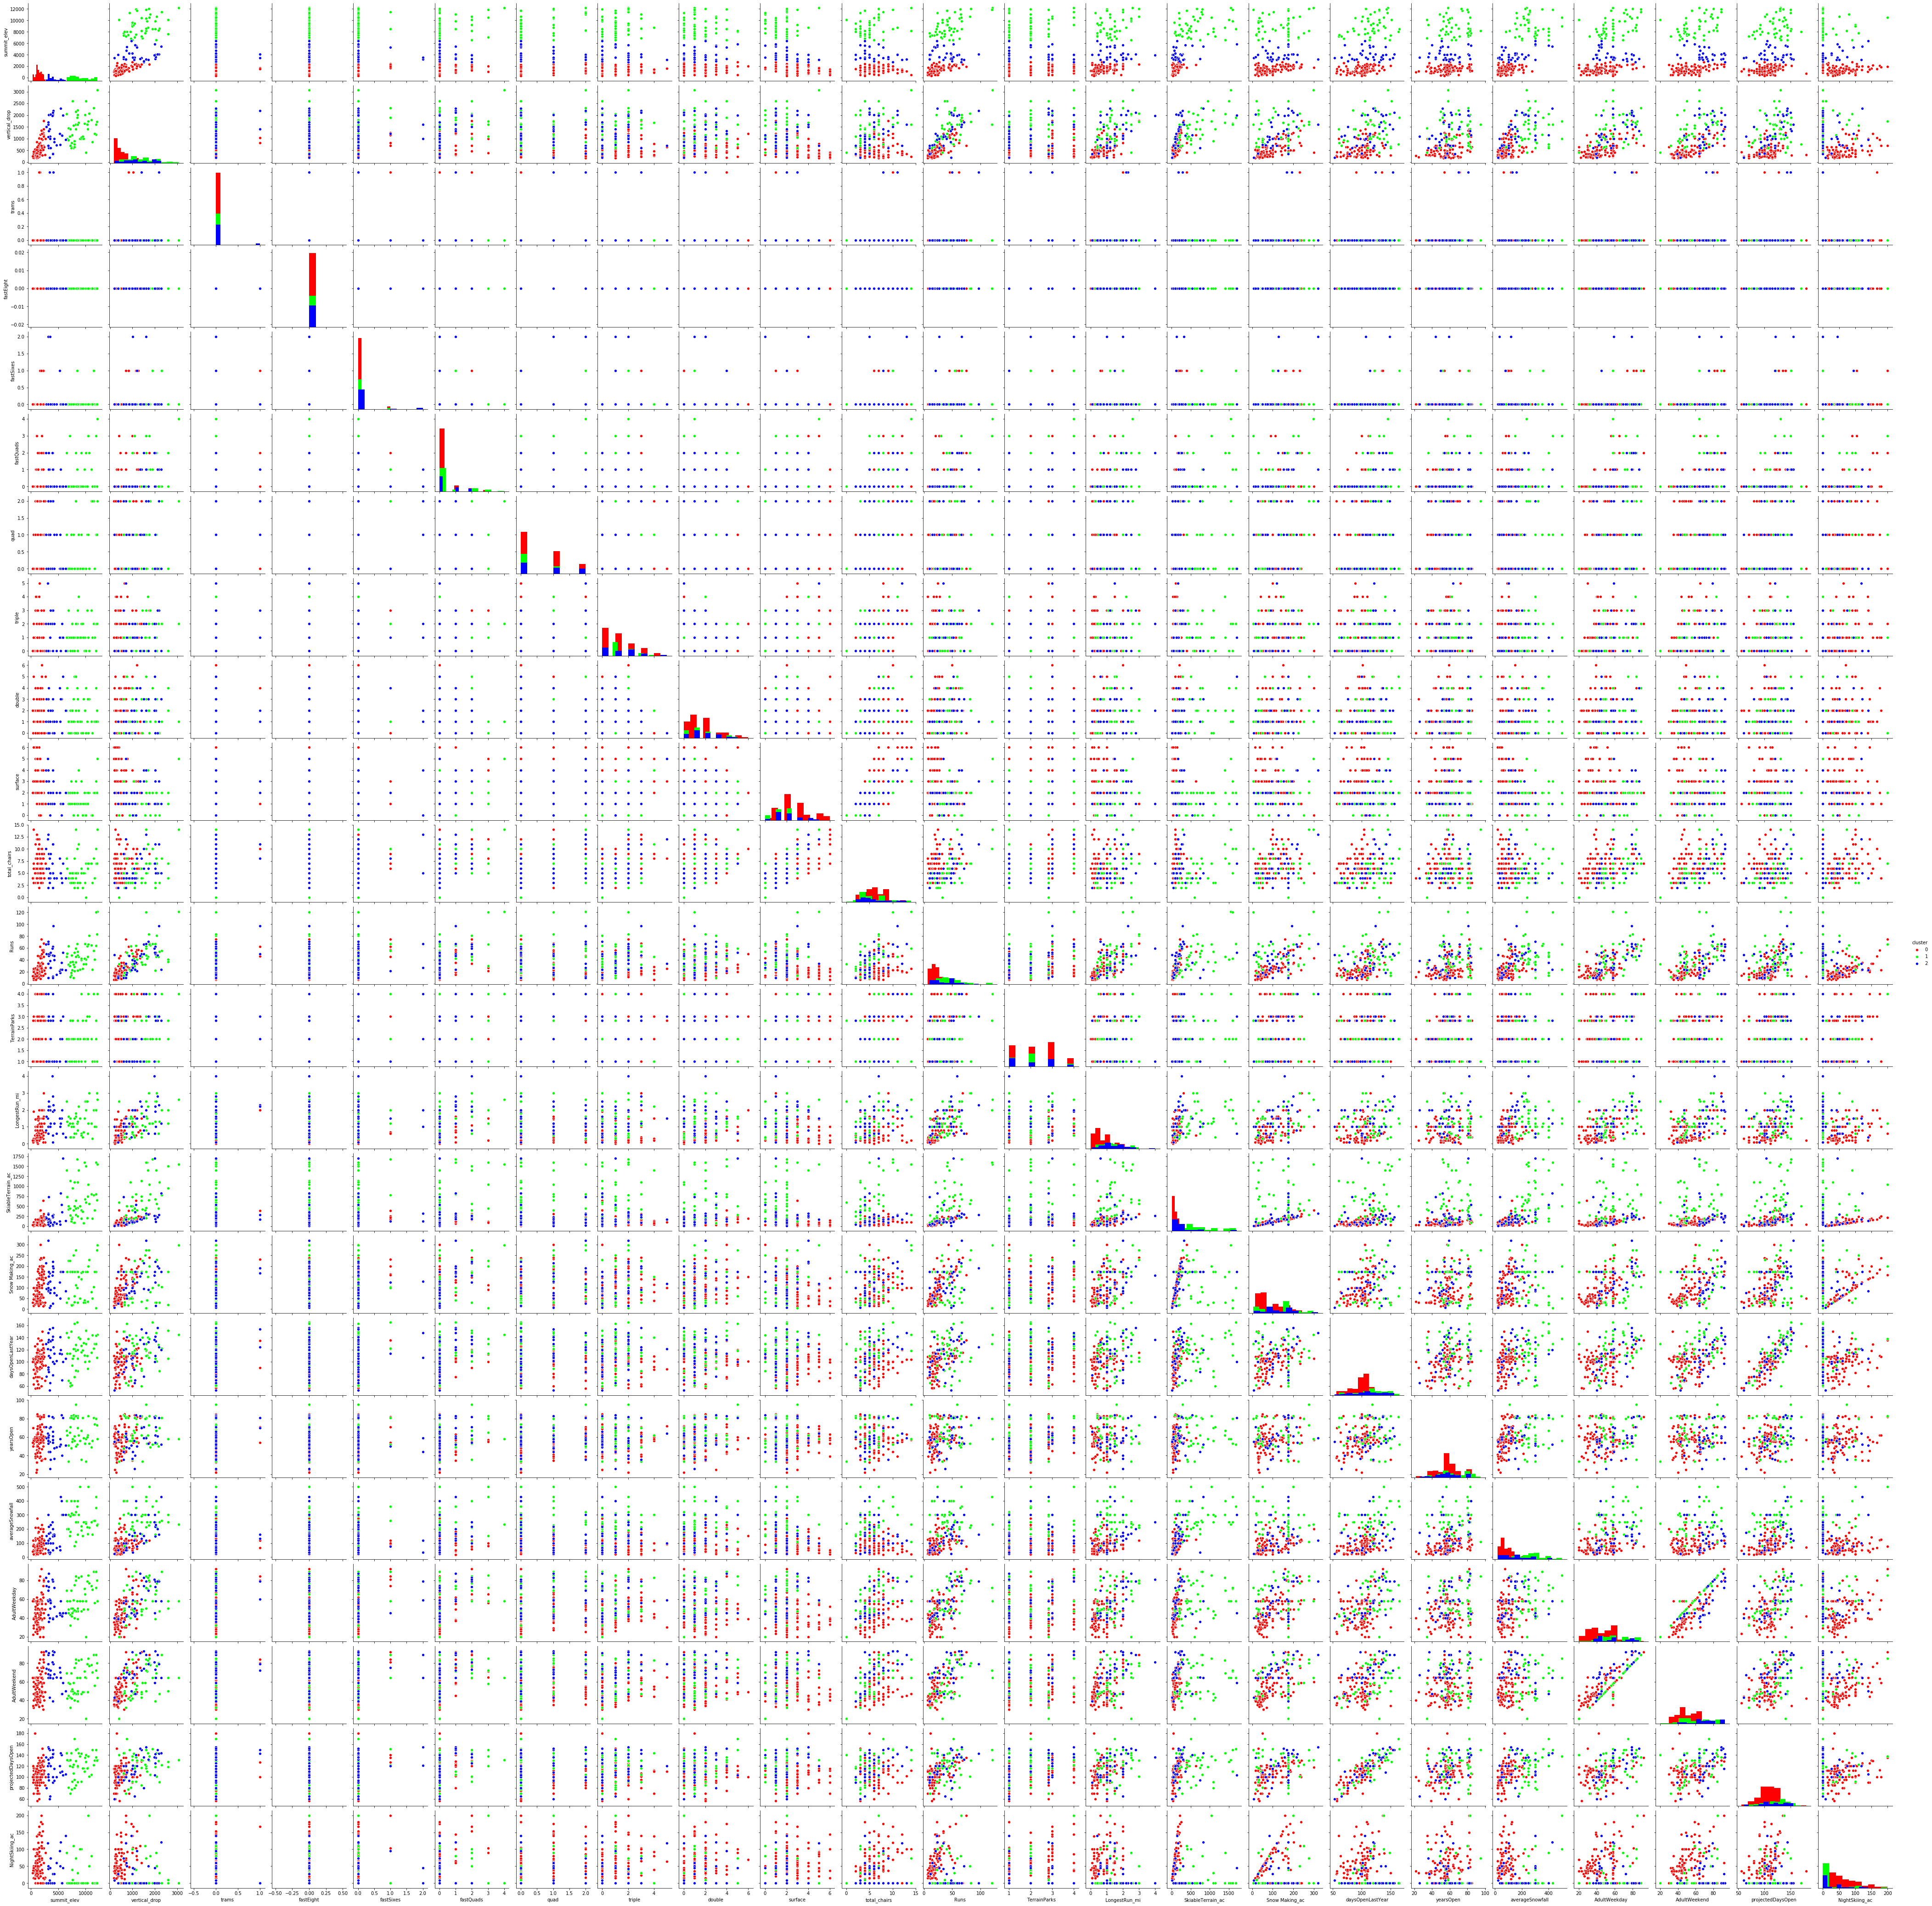

In [25]:
sns.pairplot(df, diag_kind='hist', hue='cluster', palette={0:'#FF0000', 1:'#00FF00', 2:'#0000FF'})
plt.show()

<font color='teal'>**Add the clusters to your dataframe as a new column to include in the next step of the guided capstone and write the updated dataframe out as csv. Save the dataframe in the data folder and name it `step3_output.csv`.**</font>

In [26]:
df.to_csv('./data/step3_output.csv', index=False)